<a href="https://colab.research.google.com/github/forfourr/Pre-cap/blob/main/Azure_Storage_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install azure-storage-file

In [ ]:
from azure.storage.file import FileService
#connect file service
file_service = FileService(account_name='labuser62',
                           account_key='K4l8YcEsV/tAAOCafYU3WrtNnWlBY9Wo7X5KpYR4ZOA07tB0ScyUJZ5s8XlZbbsrpPbCSoUBxuW4+ASthXXVUA==')

In [ ]:
#fileshare 만듬
file_service.create_share('myshare')

In [ ]:
#direct만듬
file_service.create_directory('myshare','sample_dir')   #myshare에 만들고 이름은 sample_dir

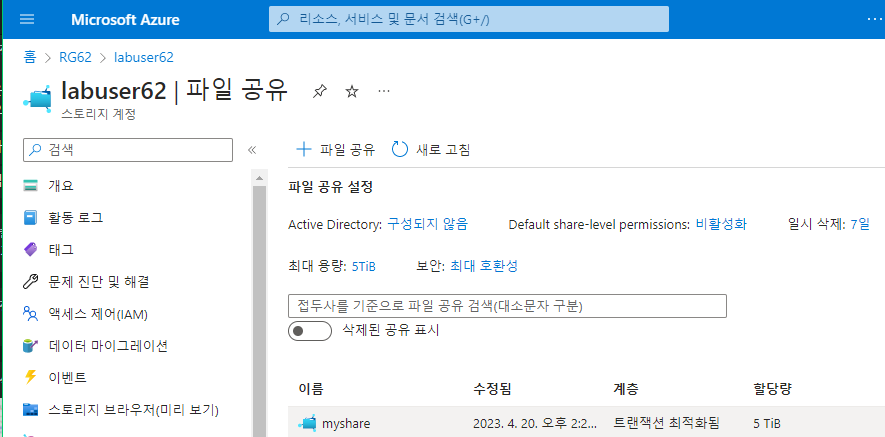

^ 생성됨

In [ ]:
#새로운 패키기 불러오기
from azure.storage.file import ContentSettings
file_service.create_file_from_path(
    'myshare',        #file 이름
    'sample_dir',     #폴더 정해줌
    'myfile.jpg',     #저장될 이름
    'imong.jpg')      #가져올 이름름

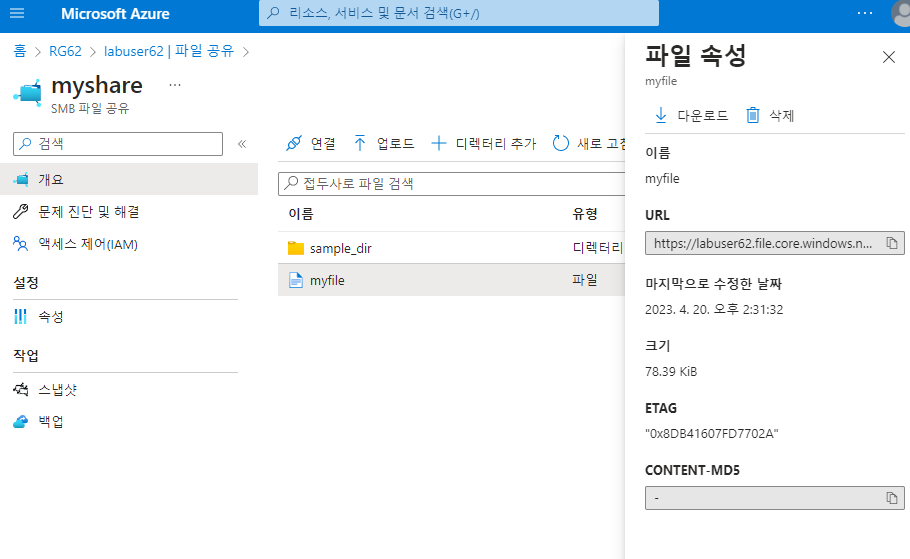

In [ ]:
#direct 내용 확인하기
generator = file_service.list_directories_and_files('myshare')
for i in generator:
    print(i.name)

In [ ]:
#file download
file_service.get_file_to_path('myshare',        #다운받을 파일명명
                              None,
                              'myfile',
                              'imongg.jpg')      #다운받을 이름름

In [ ]:
#Snapshot = 백업
metadata = {'foo':'bar'}
snapshot = file_service.snapshot_share('myshare', metadata = metadata)

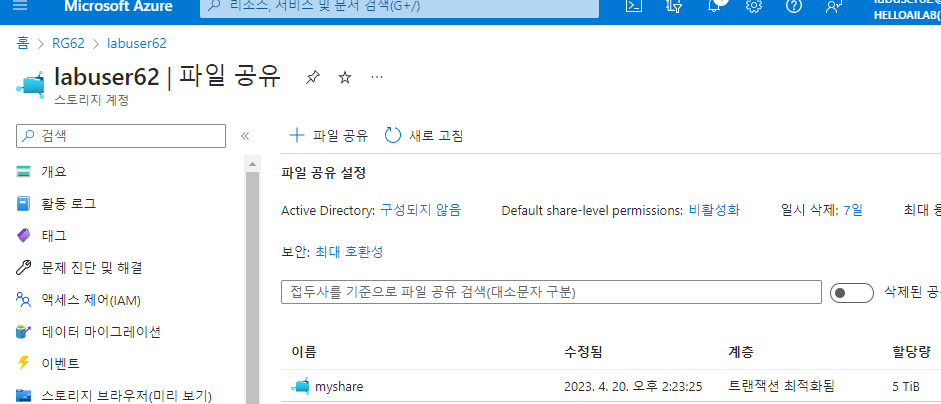

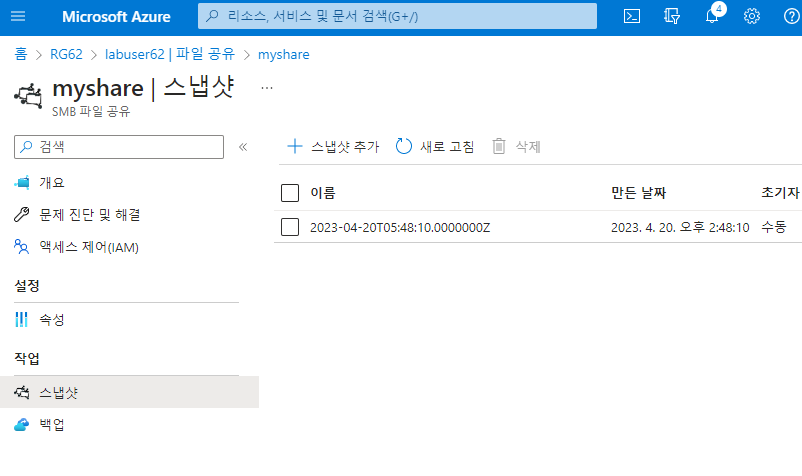

In [ ]:
share = list(file_service.list_shares(include_snapshots=True))
directories_and_file = list(file_service.list_directories_and_files('myshare',
                            snapshot='2023-04-20T05:48:10.0000000Z'))   #snapshot 불러옴

for file_or_dir in directories_and_file:
    print(file_or_dir.name)

In [ ]:
#Delete snapshot
#file_service.delete_share('myshare')       myshare 공유폴더 자체가 삭제
file_service.delete_share('myshare',snapshot='2023-04-20T05:48:10.0000000Z')    #snapshot 삭제       


In [ ]:
file_service.delete_file('myshare',
                         None,      #제일 상위 directory
                         'cat.png')  #myfile이라는 이름 삭제

In [ ]:
file_service.delete_directory('myshare',
                              'd')      # myshare안에 d폴더 삭제

In [ ]:
#delete share
file_service.delete_share('myshare') 